Objectives
• Generate simulated lidar histograms
• Estimate a depth image using a simple matched filter algorithm
• Display results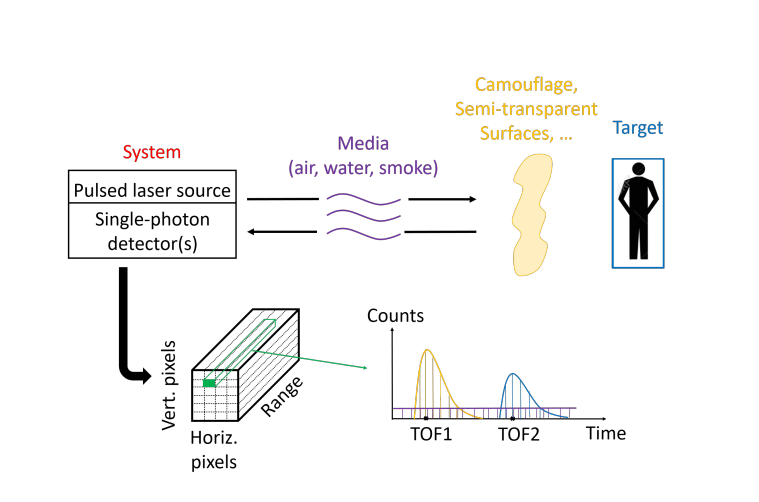


Data description
The Lidar system provides a three-dimensional cube of data where two dimensions are
related to pixels and the third is related to time-of-flight or range. For each pixel location,
the data represents a histogram of number of photon counts with respect to their time of
flight

Q1: Generate a 128x128x300 cube of data (si;j;t for i 2 [1; 128]; j 2 [1; 128]; t 2 [1; 300]).
Consider the provided Cameraman image as a depth image (the pixels of cameraman are
ti;j for i 2 [1; 128]; j 2 [1; 128]). Consider bi;j = 1; 8i; j, ri;j = 5; 8i; j and use a Gaussian
impulse response "g(x) = exp −x2
32 "

Text(0.5, 1.0, 'Original Depth Map')

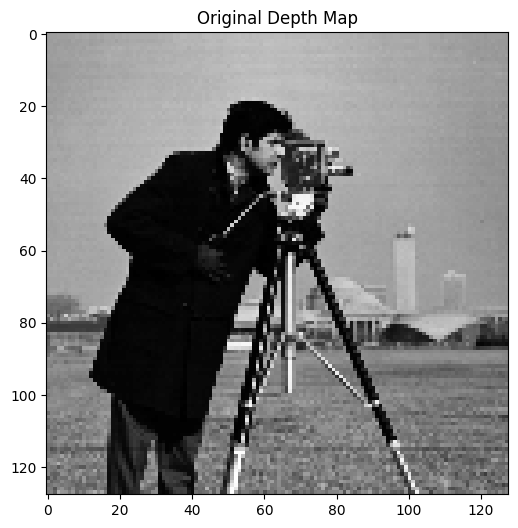

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import convolve
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.io import loadmat

mat_data = loadmat('Depth_CameraMan.mat')
ti = mat_data['CameraMan']

image = ti
ti_j = image / 255 * 128  # Normalize and scale to simulate depth

plt.figure(figsize=(12, 6))
plt.imshow(ti_j, cmap='gray')
plt.title('Original Depth Map')

In [ ]:
# Defining Constants
N, M = 128, 128           # Image dimensions
T = 300                   # Number of time bins
bi_j = 1                  # Background level
ri_j = 5                  # Intensity level
sigma = np.sqrt(32)       # Standard deviation for Gaussian impulse response

#Generate Gaussian impulse response
g = np.exp(-np.square(np.arange(T) - T / 2) / (2 * sigma**2))

In [ ]:
#Generate simulated data cube
si_j_t = np.zeros((N, M, T))
for i in range(N):
    for j in range(M):
        delay = int(ti_j[i, j])
        si_j_t[i, j, :] = ri_j * np.roll(g, delay) + bi_j

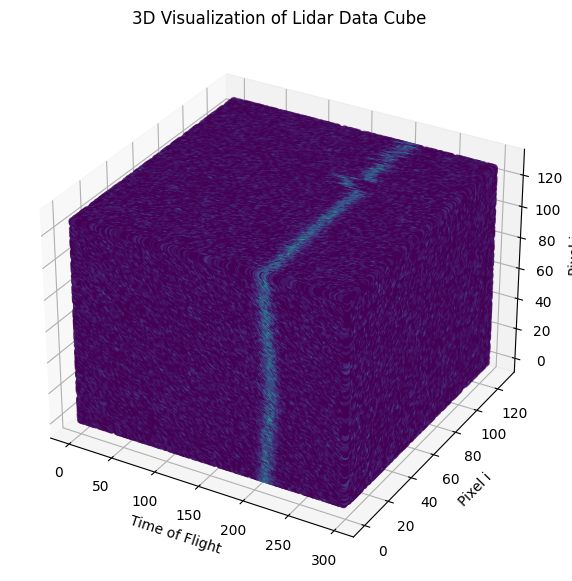

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extracting indices for non-zero elements in the data cube
nonzero_indices = np.nonzero(yi_j_t)

# Plotting 3D scatter plot
ax.scatter(nonzero_indices[2], nonzero_indices[0], nonzero_indices[1], c=yi_j_t[nonzero_indices], cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel('Time of Flight')
ax.set_ylabel('Pixel i')
ax.set_zlabel('Pixel j')
ax.set_title('3D Visualization of Lidar Data Cube')

plt.show()

Q2: Use the function “poissrnd” to generate yi;j;t from si;j;t

In [14]:
np.random.seed(0)                     # For reproducibility
yi_j_t = np.random.poisson(si_j_t)    #function in python for numpy

Q3: For this question, we assume that we do not know the true depth map ti;j for i 2
[1; 128]; j 2 [1; 128]) and will estimate a new depth map (denoted t^i;j; 8i; j) from the data
yi;j;t as follows: Use the maximum of matched filtered histograms by the impulse response,
i.e., for pixel (i,j), you need to perform t^i;j = argmaxx P300
k=1 g(x − k)yi;j;k.

In [15]:
t_hat_i_j = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        convolved = convolve(yi_j_t[i, j, :], g, mode='same')
        t_hat_i_j[i, j] = np.argmax(convolved)

Q4: Display the clean CameraMan image ti;j; 8i; j and the estimated one t^i;j; 8i; j using
the matlab function “imagesc”, how can we improve the estimated image ?

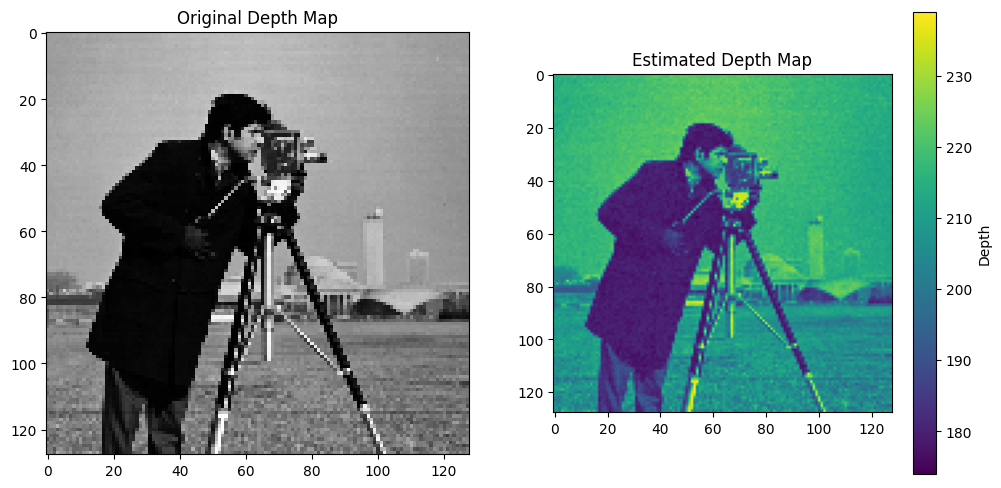

In [16]:
cmap = cm.viridis  # colormap
depth_norm = plt.Normalize(vmin=t_hat_i_j.min(), vmax=t_hat_i_j.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ti_j, cmap='gray')
plt.title('Original Depth Map')

plt.subplot(1, 2, 2)
plt.imshow(t_hat_i_j, cmap=cmap, norm=depth_norm)
plt.title('Estimated Depth Map')
plt.colorbar(label='Depth', orientation='vertical')

plt.show()

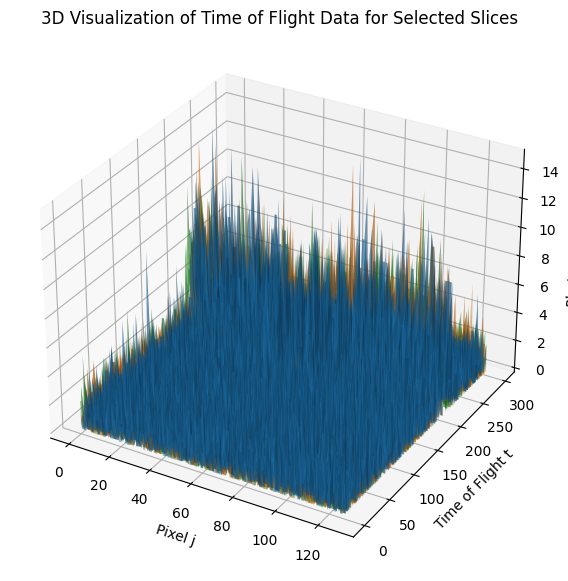

In [17]:
from mpl_toolkits.mplot3d import Axes3D

#slices for visualization in list
slice_indices = [32, 64, 96]

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting selected slices
for idx in slice_indices:
    X, Y = np.meshgrid(range(M), range(T))
    Z = yi_j_t[idx, :, :].T  # Transpose to align dimensions

    # Plot surface for each slice
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.4, label=f'Slice at i={idx}')

# Plotting
ax.set_xlabel('Pixel j')
ax.set_ylabel('Time of Flight t')
ax.set_zlabel('Photon Counts')
ax.set_title('3D Visualization of Time of Flight Data for Selected Slices')

plt.show()

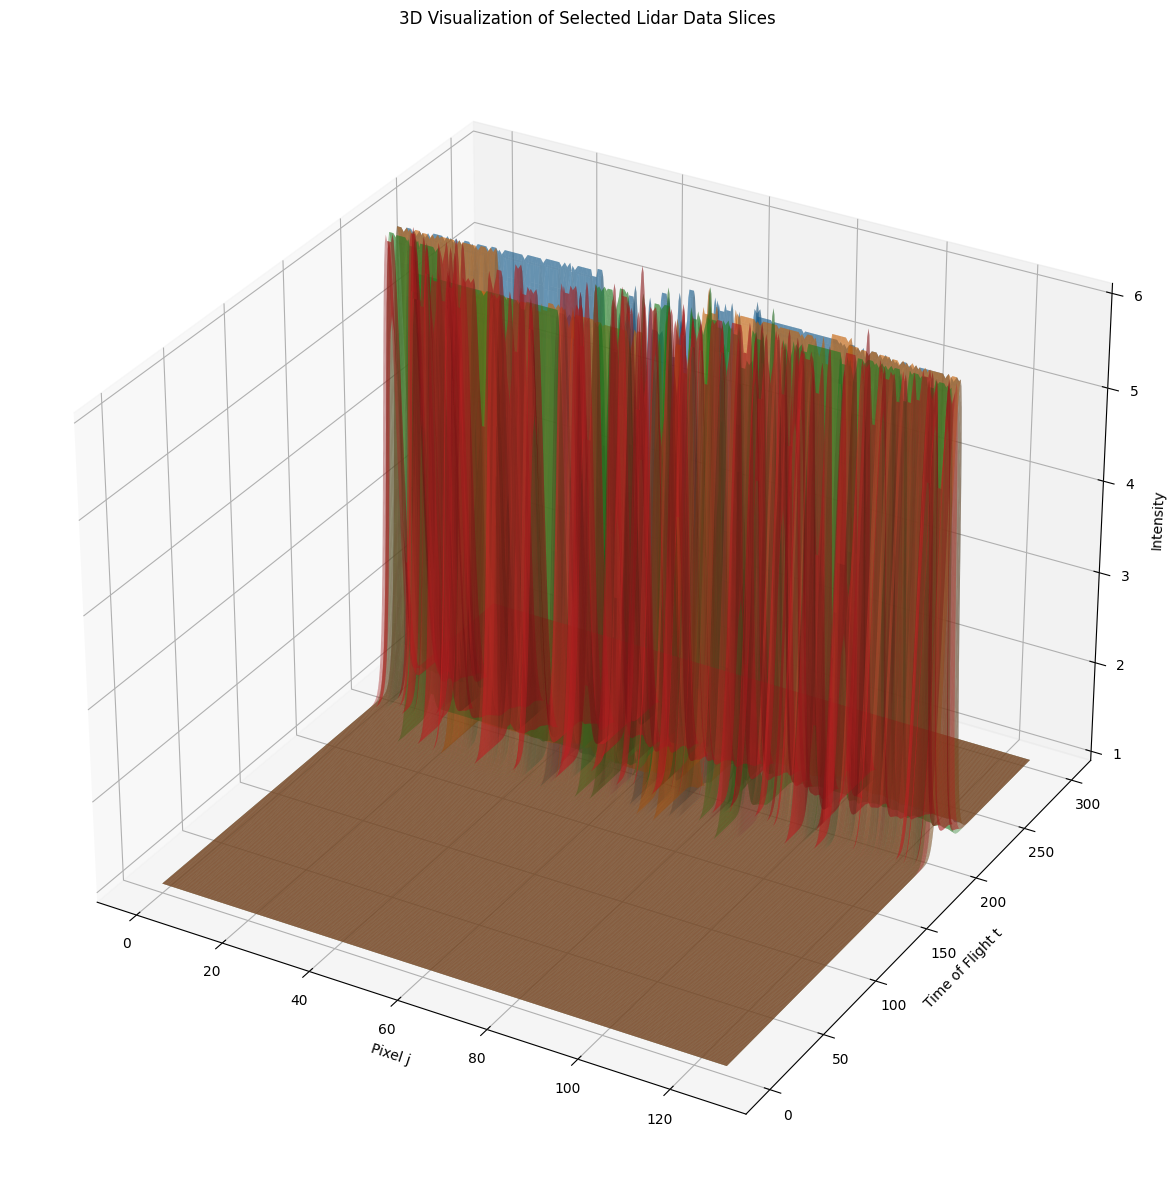

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting slices for visualization in list
slice_indices = [32, 64, 96, 127]

# Creating a 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plotting selected slices
for idx in slice_indices:
    X, Y = np.meshgrid(range(M), range(T))
    Z = si_j_t[idx, :, :].T  # Transpose to align dimensions

    # Plot surface
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.4, label=f'Slice at i={idx}')

# Labels and title
ax.set_xlabel('Pixel j')
ax.set_ylabel('Time of Flight t')
ax.set_zlabel('Intensity')
ax.set_title('3D Visualization of Selected Lidar Data Slices')

plt.show()

In [19]:
import plotly.graph_objects as go

# Select slices for visualization in list
slice_indices = [10,30,50,70,90,110]  # Example slices

# Create a 3D plot using Plotly
fig = go.Figure()

# Adding selected slices to the plot
for idx in slice_indices:
    X, Y = np.meshgrid(range(M), range(T))
    Z = si_j_t[idx, :, :].T  # Transpose to align dimensions

    # Add surface plot for each slice
    fig.add_trace(go.Surface(z=Z, x=X, y=Y, name=f'Slice at i={idx}'))

# Update layout for a better view
fig.update_layout(
    title='3D Visualization of Selected Lidar Data Slices',
    scene=dict(
        xaxis_title='Pixel j',
        yaxis_title='Time of Flight t',
        zaxis_title='Intensity'
    ),
    autosize=False,
    width=1280,
    height=1024,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

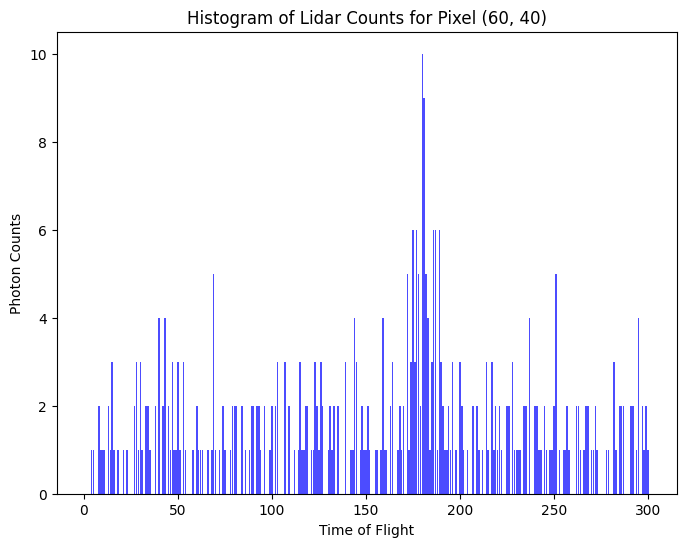

In [20]:
import matplotlib.pyplot as plt

selected_pixel = (60, 40)

# Extract Lidar data for the selected pixel
lidar_data_selected_pixel = yi_j_t[selected_pixel[0], selected_pixel[1], :]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(range(1, T + 1), lidar_data_selected_pixel, color='blue', alpha=0.7)
plt.title(f'Histogram of Lidar Counts for Pixel ({selected_pixel[0]}, {selected_pixel[1]})')
plt.xlabel('Time of Flight')
plt.ylabel('Photon Counts')
plt.show()
